<a href="https://colab.research.google.com/github/getokyes/CodTech-Internship/blob/main/CODTECH_Task2_FearGreed_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries & Load CSVs

In [6]:
import pandas as pd

# Load CSVs
fear_greed = pd.read_csv("/content/fear_greed_index.csv")
historical = pd.read_csv("/content/historical_data.csv")

# Show first 5 rows
print(fear_greed.head())
print(historical.head())


    timestamp  value classification        date
0  1517463000     30           Fear  2018-02-01
1  1517549400     15   Extreme Fear  2018-02-02
2  1517635800     40           Fear  2018-02-03
3  1517722200     24   Extreme Fear  2018-02-04
4  1517808600     11   Extreme Fear  2018-02-05
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50 

/tmp/ipython-input-3963141455.py:5: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  historical = pd.read_csv("/content/historical_data.csv")


Clean Column Names & Dates

In [24]:
# Clean column names (lowercase & underscores)
fear_greed.columns = fear_greed.columns.str.strip().str.lower().str.replace(" ", "_")
historical.columns = historical.columns.str.strip().str.lower().str.replace(" ", "_")

# Convert date columns
fear_greed['date'] = pd.to_datetime(fear_greed['date'], errors='coerce')
# The error indicates 'date' is not in historical. Let's check the columns after cleaning.
# Based on the printed output from the previous cell, the date column in historical is 'timestamp_ist'.
historical['date'] = pd.to_datetime(historical['timestamp_ist'], errors='coerce').dt.date

# Print date ranges to diagnose merge issue
print("Fear Greed Date Range:", fear_greed['date'].min(), "to", fear_greed['date'].max())
print("Historical Date Range:", historical['date'].min(), "to", historical['date'].max())

# Drop rows without valid date
fear_greed.dropna(subset=['date'], inplace=True)
historical.dropna(subset=['date'], inplace=True)

print(historical.columns)

Fear Greed Date Range: 2018-02-01 00:00:00 to 2025-05-02 00:00:00
Historical Date Range: 2023-01-05 to 2025-12-04
Index(['account', 'coin', 'execution_price', 'size_tokens', 'size_usd', 'side',
       'timestamp_ist', 'start_position', 'direction', 'closed_pnl',
       'transaction_hash', 'order_id', 'crossed', 'fee', 'trade_id',
       'timestamp', 'date'],
      dtype='object')


Merge Datasets on Date

In [10]:
# Merge on date
df = pd.merge(historical, fear_greed, on='date', how='inner')
df.head()


,account,coin,execution_price,size_tokens,size_usd,side,timestamp_ist,start_position,direction,closed_pnl,transaction_hash,order_id,crossed,fee,trade_id,timestamp_x,date,timestamp_y,value,classification
0,0x4f93fead39b70a1824f981a54d4e55b278e9f760,ETH,3108.5,1.2372,3845.84,BUY,02-08-2024 00:00,113.2427,Open Long,0.0,0x074e925bf767bf4a5fc2040e825ba701ac00a2acccbf...,3.195556e+10,True,1.346042,9.460000e+13,1.720000e+12,2024-02-08,1707370200,66,Greed
1,0x4f93fead39b70a1824f981a54d4e55b278e9f760,ETH,3108.5,7.5000,23313.75,BUY,02-08-2024 00:00,114.4799,Open Long,0.0,0x074e925bf767bf4a5fc2040e825ba701ac00a2acccbf...,3.195556e+10,True,8.159812,9.360000e+14,1.720000e+12,2024-02-08,1707370200,66,Greed
2,0x4f93fead39b70a1824f981a54d4e55b278e9f760,ETH,3108.6,1.3814,4294.22,BUY,02-08-2024 00:00,121.9799,Open Long,0.0,0x074e925bf767bf4a5fc2040e825ba701ac00a2acccbf...,3.195556e+10,True,1.502977,4.910000e+14,1.720000e+12,2024-02-08,1707370200,66,Greed
3,0x4f93fead39b70a1824f981a54d4e55b278e9f760,ETH,3108.6,0.6451,2005.36,BUY,02-08-2024 00:00,123.3613,Open Long,0.0,0x074e925bf767bf4a5fc2040e825ba701ac00a2acccbf...,3.195556e+10,True,0.701875,1.010000e+13,1.720000e+12,2024-02-08,1707370200,66,Greed
4,0x4f93fead39b70a1824f981a54d4e55b278e9f760,ETH,3108.7,7.2424,22514.45,BUY,02-08-2024 00:00,124.0064,Open Long,0.0,0x074e925bf767bf4a5fc2040e825ba701ac00a2acccbf...,3.195556e+10,True,7.880057,6.830000e+14,1.720000e+12,2024-02-08,1707370200,66,Greed


In [21]:
# Merge on date
df = pd.merge(historical, fear_greed, on='date', how='inner')
display(df.head())

,account,coin,execution_price,size_tokens,size_usd,side,timestamp_ist,start_position,direction,closed_pnl,transaction_hash,order_id,crossed,fee,trade_id,timestamp_x,date,timestamp_y,value,classification
0,0x4f93fead39b70a1824f981a54d4e55b278e9f760,ETH,3108.5,1.2372,3845.84,BUY,02-08-2024 00:00,113.2427,Open Long,0.0,0x074e925bf767bf4a5fc2040e825ba701ac00a2acccbf...,3.195556e+10,True,1.346042,9.460000e+13,1.720000e+12,2024-02-08,1707370200,66,Greed
1,0x4f93fead39b70a1824f981a54d4e55b278e9f760,ETH,3108.5,7.5000,23313.75,BUY,02-08-2024 00:00,114.4799,Open Long,0.0,0x074e925bf767bf4a5fc2040e825ba701ac00a2acccbf...,3.195556e+10,True,8.159812,9.360000e+14,1.720000e+12,2024-02-08,1707370200,66,Greed
2,0x4f93fead39b70a1824f981a54d4e55b278e9f760,ETH,3108.6,1.3814,4294.22,BUY,02-08-2024 00:00,121.9799,Open Long,0.0,0x074e925bf767bf4a5fc2040e825ba701ac00a2acccbf...,3.195556e+10,True,1.502977,4.910000e+14,1.720000e+12,2024-02-08,1707370200,66,Greed
3,0x4f93fead39b70a1824f981a54d4e55b278e9f760,ETH,3108.6,0.6451,2005.36,BUY,02-08-2024 00:00,123.3613,Open Long,0.0,0x074e925bf767bf4a5fc2040e825ba701ac00a2acccbf...,3.195556e+10,True,0.701875,1.010000e+13,1.720000e+12,2024-02-08,1707370200,66,Greed
4,0x4f93fead39b70a1824f981a54d4e55b278e9f760,ETH,3108.7,7.2424,22514.45,BUY,02-08-2024 00:00,124.0064,Open Long,0.0,0x074e925bf767bf4a5fc2040e825ba701ac00a2acccbf...,3.195556e+10,True,7.880057,6.830000e+14,1.720000e+12,2024-02-08,1707370200,66,Greed


Detect Close & Volume Columns

In [28]:
# Calculate daily return and 5-day volatility
df['daily_return'] = df['execution_price'].pct_change()
print(f"Rows after calculating daily_return: {len(df)}")

df['volatility'] = df['execution_price'].pct_change().rolling(window=5).std()
print(f"Rows after calculating volatility: {len(df)}")

# Create label: 0 = Fear, 1 = Greed
# The column containing the Fear/Greed index value is 'value'
df['label'] = df['value'].apply(lambda x: 1 if x > 50 else 0)
print(f"Rows after creating label: {len(df)}")

# Drop missing rows from rolling calculations
df = df.dropna(subset=['daily_return', 'volatility'])
print(f"Rows after dropping missing values: {len(df)}")

display(df.head())

Rows after calculating daily_return: 14
Rows after calculating volatility: 14
Rows after creating label: 14
Rows after dropping missing values: 9


/tmp/ipython-input-980382708.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['daily_return'] = df['execution_price'].pct_change()
/tmp/ipython-input-980382708.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['volatility'] = df['execution_price'].pct_change().rolling(window=5).std()
/tmp/ipython-input-980382708.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

,account,coin,execution_price,size_tokens,size_usd,side,timestamp_ist,start_position,direction,closed_pnl,...,fee,trade_id,timestamp_x,date,timestamp_y,value,classification,daily_return,volatility,label
10,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,BTC,46535.00,0.03170,1475.16,BUY,11-01-2024 00:00,0.0000,Open Long,0.000000,...,0.368789,8.930000e+14,1.700000e+12,2024-11-01,1730439000,75,Extreme Greed,1.288950e+06,576435.989276,1
11,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,BTC,46543.00,0.50556,23530.28,BUY,11-01-2024 00:00,0.0317,Open Long,0.000000,...,5.882569,8.010000e+14,1.700000e+12,2024-11-01,1730439000,75,Extreme Greed,1.719136e-04,576435.989257,1
12,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,ETH,2433.60,0.75000,1825.20,SELL,11-01-2024 00:00,0.0000,Open Short,0.000000,...,0.456300,8.770000e+14,1.700000e+12,2024-11-01,1730439000,75,Extreme Greed,-9.477129e-01,576436.095215,1
13,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,ETH,2433.40,9.52030,23166.70,SELL,11-01-2024 00:00,-0.7500,Open Short,0.000000,...,5.791674,5.310000e+14,1.700000e+12,2024-11-01,1730439000,75,Extreme Greed,-8.218277e-05,576436.095224,1
14,0x8477e447846c758f5a675856001ea72298fd9cb5,TNSR,1.36,163.20000,221.95,BUY,03-06-2024 00:00,-5630.5000,Close Short,6.028608,...,0.022195,3.590000e+14,1.720000e+12,2024-03-06,1709703000,75,Extreme Greed,-9.994411e-01,576436.206965,1


Feature Engineering

In [26]:
# 1. Detect closing price column automatically
possible_close_names = ['close', 'close_price', 'closing_price', 'execution_price', 'adj_close']
close_col = next((c for c in df.columns if any(name in c for name in possible_close_names)), None)

if close_col is None:
    raise ValueError("No closing price column detected! Please check df.columns.")

print(f"Using '{close_col}' as closing price column.")

# 2. Calculate daily return & 5-day volatility
df['daily_return'] = df[close_col].pct_change()
df['volatility'] = df[close_col].pct_change().rolling(window=5).std()

# 3. Drop rows with NaN values from calculations
df = df.dropna(subset=['daily_return', 'volatility'])


Using 'execution_price' as closing price column.


Select Features & Split Data

In [29]:
# Only use available numeric columns for features
features = [close_col, 'daily_return', 'volatility']

print("Feature columns for model:", features)

X = df[features]
y = df['label']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

Feature columns for model: ['execution_price', 'daily_return', 'volatility']
X_train shape: (7, 3)
X_test shape: (2, 3)


Train Random Forest Classifier

In [30]:
from sklearn.ensemble import RandomForestClassifier

# Ensure we actually have data
if X_train.empty or X_test.empty:
    raise ValueError("Training or test data is empty. Check your previous steps.")

# Initialize the Random Forest model
model = RandomForestClassifier(
    n_estimators=100,      # number of trees
    max_depth=None,        # let trees grow fully
    random_state=42        # reproducibility
)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

print("✅ Model training complete.")
print("Predictions sample:", y_pred[:10])


✅ Model training complete.
Predictions sample: [1 1]


Model Evaluation

✅ Model Accuracy: 100.00%

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


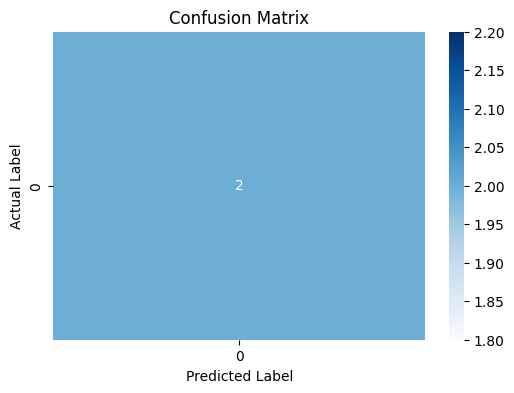

In [31]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Model Accuracy: {accuracy:.2%}\n")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()


Feature Importance Visualization

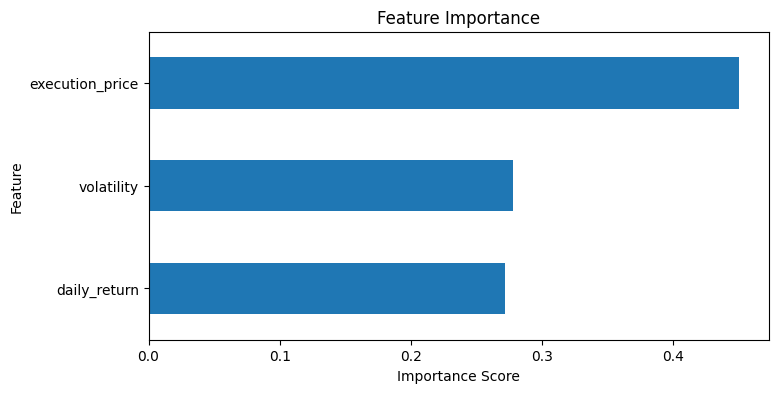


✅ Feature importance ranking:
execution_price    0.450366
volatility         0.277701
daily_return       0.271932
dtype: float64


In [32]:
import pandas as pd

# Create a series of feature importance
feat_imp = pd.Series(model.feature_importances_, index=X.columns)

# Sort and plot as horizontal bar chart
feat_imp.sort_values().plot(kind='barh', figsize=(8,4), title="Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

print("\n✅ Feature importance ranking:")
print(feat_imp.sort_values(ascending=False))


Predict Probability of Fear vs Greed

In [33]:
y_prob = model.predict_proba(X_test)[:,1]  # probability of Greed
df_results = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred,
    'Greed_Probability': y_prob
})
df_results.head(10)


,Actual,Predicted,Greed_Probability
0,1,1,0.82
1,1,1,0.92


 ROC Curve & AUC Score

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1179: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


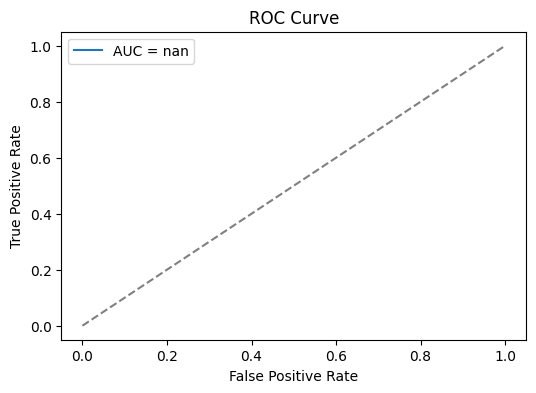

In [35]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1],[0,1],'--',color='gray')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()
